---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Práctica 2: Introducción a la modelación numérica </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---


---
<a name='ej-1'></a>
### **<font color="Navy">Ejercicio 1 - Balance hidrostático (10 puntos) </font>**

1. Resuelva la ecuación hidrostática pero utilizando dos temperaturas diferentes $T_c=300$ K y $T_c=280$ K. Obtenga la soluciones de manera analítica y utilizando diferencias finitas hacia atrás. Para las soluciones numéricas utilice diferentes resoluciones o intervalos $h_z$: $h_z=100$ m, $h_z=500$ m y $h_z=2000$ m. Grafique la solución en el intervalo 0-20000 m.
    
2. Haga 3 subplots. En los primeros 2 subplots, grafique la solución analítica junto con las 3 soluciones numéricas para cada temperatura por separado, cada temperatura en subplot diferente. En el tercer subplot, grafique la solución analítica y numérica (sólo $h_z=500$ m) de ambas temperaturas. Interprete sus resultados.
    
3. La escala de altura ($H$) es un parámetro físico que nos dice algo sobre a qué altura la presión atmosférica disminuye exactamente $\frac{1}{e}$ y que se define como $H=\frac{R_dT}{g}$ donde $R_d$ es la constante de la atmósfera seca. Calcule la escala de altura de los dos casos anteriores y agregue una línea horizontal a sus gráficas para indicar la escala de altura de cada temperatura. Luego, grafique la escala de altura como función de la temperatura superficial en el intervalo de 273.15 K a 303.15 K y discuta sus resultados. 

---

In [13]:
import numpy as np
import matplotlib.pyplot as plt
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)

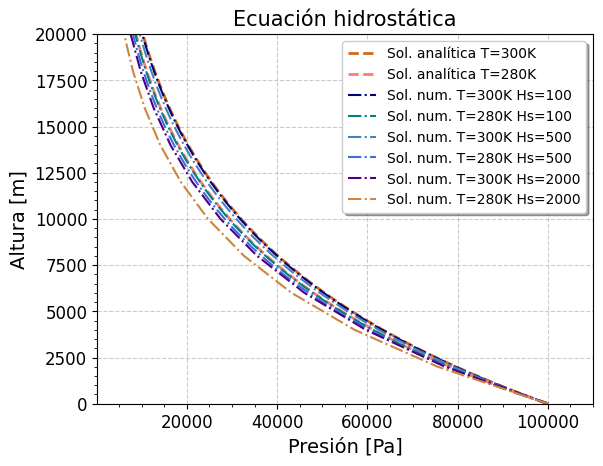

In [14]:
#ejercicio 1
#primero, definiremos nuestra sol. analítica para las dos temperaturas 
def exponent(z,Tc,g=9.806,R=8.3144,Ma=28.97e-3):
    Rd=R/Ma
    return -z*g/(Rd*Tc)
def p_z(z,Tc,p0):
    # funcion para la solucion analitica
    p=p0*np.exp(exponent(z,Tc))
    return p
def density(P,Tc,R=8.3144,Ma=28.97e-3):
    Rd=R/Ma
    return P/(Rd*Tc)

# condiciones fronteras 
p0 = 1e5
g=9.806

# Temperaturas del ejercicio
Tc1=300
Tc2=280

z=np.arange(0,3e4)
P1=p_z(z,Tc1,p0)
P2=p_z(z,Tc2,p0)

#nuestros intervalos para dif. finitas hacia atrás 
hs1 = 100
hs2 = 500
hs3 = 2000

z_values1 = np.arange(0, 3e4, hs1)
z_values2 = np.arange(0, 3e4, hs2)
z_values3 = np.arange(0, 3e4, hs3)

p_values1 = np.zeros(len(z_values1)) #Tc1 con hs1
p_values2 = np.zeros(len(z_values1)) #Tc2 con hs1
p_values3 = np.zeros(len(z_values2)) #Tc1 con hs2
p_values4 = np.zeros(len(z_values2)) #Tc2 con hs2
p_values5 = np.zeros(len(z_values3)) #Tc1 con hs3
p_values6 = np.zeros(len(z_values3)) #Tc2 con hs1

# iniciamos la solución
p_values1[0] = p0
p_values2[0] = p0
p_values3[0] = p0
p_values4[0] = p0
p_values5[0] = p0
p_values6[0] = p0

# Esquema de diferencias finitas hacia atrás para ODE
for n in range(1, len(z_values1)):
    p_values1[n] = p_values1[n-1] + hs1 * (-density(p_values1[n-1],Tc1) * g)
    p_values2[n] = p_values2[n-1] + hs1 * (-density(p_values2[n-1],Tc2) * g)

for n in range(1, len(z_values2)):
    p_values3[n] = p_values3[n-1] + hs2 * (-density(p_values3[n-1],Tc1) * g)
    p_values4[n] = p_values4[n-1] + hs2 * (-density(p_values4[n-1],Tc2) * g)

for n in range(1, len(z_values3)):
    p_values5[n] = p_values5[n-1] + hs3 * (-density(p_values5[n-1],Tc1) * g)
    p_values6[n] = p_values6[n-1] + hs3 * (-density(p_values6[n-1],Tc2) * g)

plt.plot(P1,z,label='Sol. analítica T=300K',linewidth=2,c='chocolate',linestyle='--')
plt.plot(P2,z,label='Sol. analítica T=280K',linewidth=2,c='salmon',linestyle='--')

#primer for
plt.plot(p_values1,z_values1,c='navy',label='Sol. num. T=300K Hs=100',linestyle='-.')
plt.plot(p_values2,z_values1,c='teal',label='Sol. num. T=280K Hs=100',linestyle='-.')
#segundo for
plt.plot(p_values3,z_values2,c='steelblue',label='Sol. num. T=300K Hs=500',linestyle='-.')
plt.plot(p_values4,z_values2,c='royalblue',label='Sol. num. T=280K Hs=500',linestyle='-.')
#tercer for
plt.plot(p_values5,z_values3,c='indigo',label='Sol. num. T=300K Hs=2000',linestyle='-.')
plt.plot(p_values6,z_values3,c='peru',label='Sol. num. T=280K Hs=2000',linestyle='-.')

plt.legend(fancybox=True,fontsize=10, shadow=True)
lineplot_setup(1e2,1.1e5,ymin=0,ymax=2e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuación hidrostática')

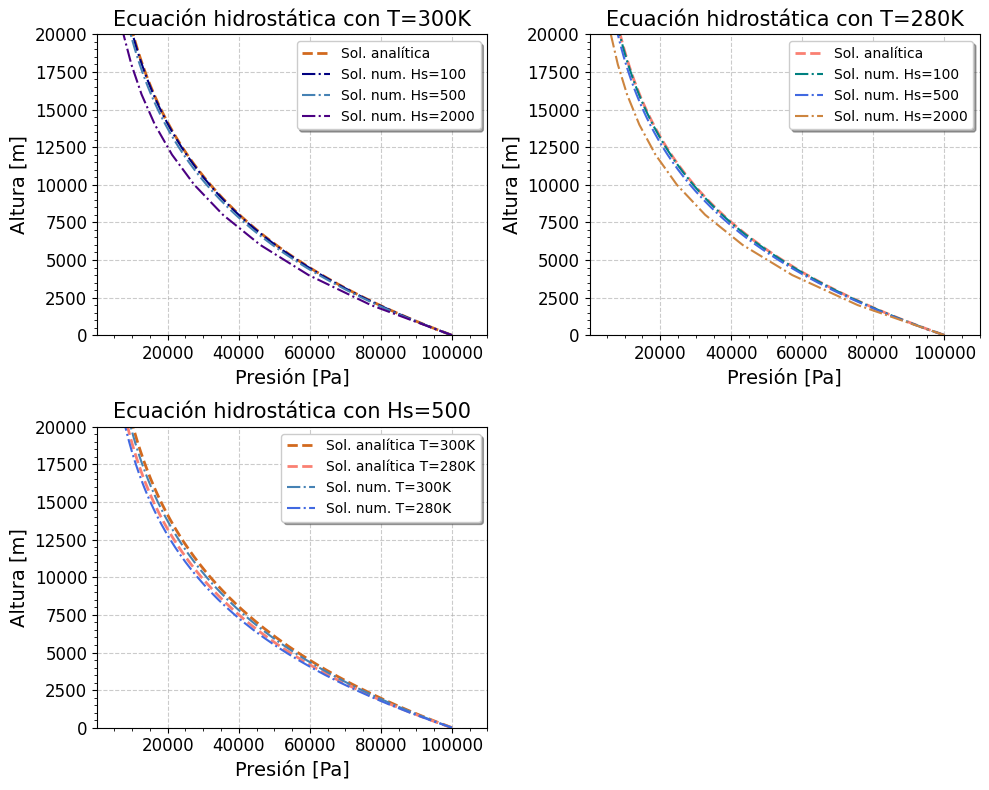

In [15]:
#ejercicio 2
plt.figure(figsize=(10, 8))

# Subgráfico 1
plt.subplot(2, 2, 1)
plt.plot(P1,z,label='Sol. analítica',linewidth=2,c='chocolate',linestyle='--')
plt.plot(p_values1,z_values1,c='navy',label='Sol. num. Hs=100',linestyle='-.')
plt.plot(p_values3,z_values2,c='steelblue',label='Sol. num. Hs=500',linestyle='-.')
plt.plot(p_values5,z_values3,c='indigo',label='Sol. num. Hs=2000',linestyle='-.')
plt.legend(fontsize=10,fancybox=True,shadow=True)
lineplot_setup(1e2,1.1e5,ymin=0,ymax=2e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuación hidrostática con T=300K')

# Subgráfico 2
plt.subplot(2, 2, 2)
plt.plot(P2,z,label='Sol. analítica',linewidth=2,c='salmon',linestyle='--')
plt.plot(p_values2,z_values1,c='teal',label='Sol. num. Hs=100',linestyle='-.')
plt.plot(p_values4,z_values2,c='royalblue',label='Sol. num. Hs=500',linestyle='-.')
plt.plot(p_values6,z_values3,c='peru',label='Sol. num. Hs=2000',linestyle='-.')
plt.legend(fontsize=10,fancybox=True,shadow=True)
lineplot_setup(1e2,1.1e5,ymin=0,ymax=2e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuación hidrostática con T=280K')

# Subgráfico 3
plt.subplot(2, 2, 3)
plt.plot(P1,z,label='Sol. analítica T=300K',linewidth=2,c='chocolate',linestyle='--')
plt.plot(P2,z,label='Sol. analítica T=280K',linewidth=2,c='salmon',linestyle='--')
plt.plot(p_values3,z_values2,c='steelblue',label='Sol. num. T=300K',linestyle='-.')
plt.plot(p_values4,z_values2,c='royalblue',label='Sol. num. T=280K',linestyle='-.')
plt.legend(fontsize=10,fancybox=True,shadow=True)
lineplot_setup(1e2,1.1e5,ymin=0,ymax=2e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuación hidrostática con Hs=500')

plt.tight_layout()

Al modificar las gráficas a subplots es mucho más sencillo visualizar las gráficas y cómo se comporta la ecuación hidrostática a diferentes temperaturas. En primera instancia, a una temperatura menor, que en nuestro caso es 280K, se observa que conforme aumenta la altura, la presión disminuye y viceversa. La diferencia con una temperatura mayor, que en este caso es 300K, es que disminuye más rápido. Por ello, a nuestra baja temperatura, a los 40,000 Pa, tiene como altura 6000 m, mietras que a esa misma presión, la temperatura de 300K tiene una altura de casi 7500 m. 

Asimismo, como vimos a lo largo de las clases, para una mejor interpretración, la solución analítica es la más adecuada y certera 

In [16]:
# ejercicio 3
def high_scale(T, Rd=287, g=9.806):
    H=(Rd*T)/g
    return H

H1= high_scale(Tc1)
H2= high_scale(Tc2)
# estas las vamos a agregar a nuestras gráficas como una línea punteada 

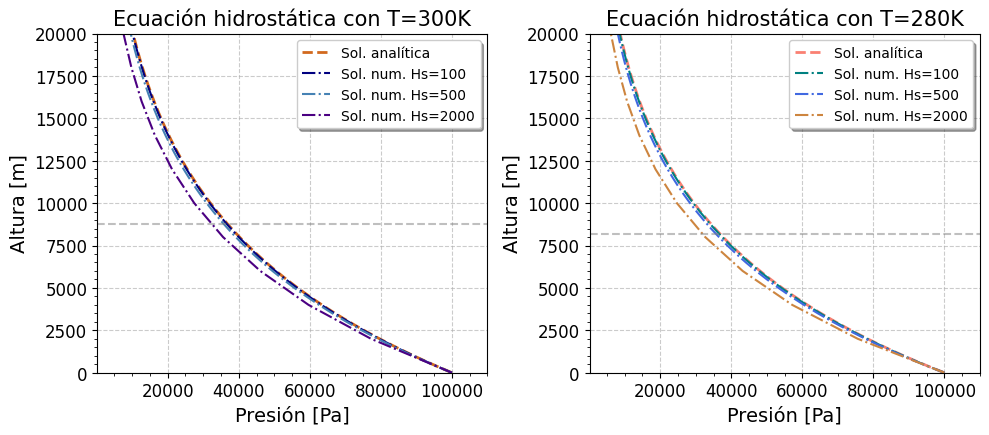

In [17]:
plt.figure(figsize=(10, 8))

# Subgráfico 1
plt.subplot(2, 2, 1)
plt.plot(P1,z,label='Sol. analítica',linewidth=2,c='chocolate',linestyle='--')
plt.plot(p_values1,z_values1,c='navy',label='Sol. num. Hs=100',linestyle='-.')
plt.plot(p_values3,z_values2,c='steelblue',label='Sol. num. Hs=500',linestyle='-.')
plt.plot(p_values5,z_values3,c='indigo',label='Sol. num. Hs=2000',linestyle='-.')
plt.axhline(y=H1,c='gray',linestyle='--',alpha=0.5)
plt.legend(fontsize=10,fancybox=True,shadow=True)
lineplot_setup(1e2,1.1e5,ymin=0,ymax=2e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuación hidrostática con T=300K')

# Subgráfico 2
plt.subplot(2, 2, 2)
plt.plot(P2,z,label='Sol. analítica',linewidth=2,c='salmon',linestyle='--')
plt.plot(p_values2,z_values1,c='teal',label='Sol. num. Hs=100',linestyle='-.')
plt.plot(p_values4,z_values2,c='royalblue',label='Sol. num. Hs=500',linestyle='-.')
plt.plot(p_values6,z_values3,c='peru',label='Sol. num. Hs=2000',linestyle='-.')
plt.axhline(y=H2,c='gray',linestyle='--',alpha=0.5)
plt.legend(fontsize=10,fancybox=True,shadow=True)
lineplot_setup(1e2,1.1e5,ymin=0,ymax=2e4,xlab='Presión [Pa]',ylab='Altura [m]',title='Ecuación hidrostática con T=280K')

plt.tight_layout()

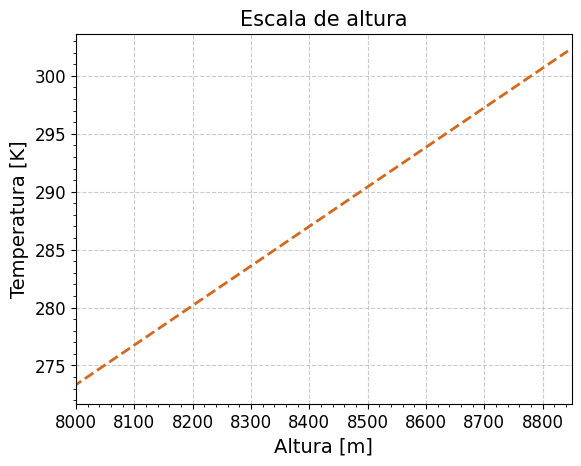

In [18]:
temps = np.arange(273.15, 303.15)
new_temps = high_scale(temps)

plt.plot(new_temps,temps,linewidth=2,c='chocolate',linestyle='--')
lineplot_setup(8000,8850,ymin=None,ymax=None,xlab='Altura [m]',ylab='Temperatura [K]',title='Escala de altura')

### **<font color="Navy"> 2. Nunca confíen en el profe. (11) </font>**

Durante toda la clase, el profe dijo que Budyko utilizó una parametrización de radiación saliente de onda larga (OLR) como $\sigma \epsilon T_s^4$ y esto no es cierto. Budyko, en realidad, utilizó la siguiente ecuación para describir la OLR:

\begin{align}
OLR = a + bT
\end{align}
 
donde $a$ y $b$ son dos coeficientes calculados por Budyko con valores de $a=240$ W m$^{2}$ y $b=2.17$ W m$^{2}$. 

1. Haga una función para utilizar esta parametrización como función de un arreglo o flotante de temperatura. Grafique esta función y compárela con la que manejamos en clase como parametrización de Budyko (utilizando un valor de $\epsilon=0.75$) y la parametrización de OLR de Sellers. 

2. Haga una simulación del modelo de Budyko utilizando esta parametrización y compare los resultados de la simulación con los de la parametrización original.  Utilice el número de gráficas que usted considere suficiente. 

3. Explique las diferencias en el comportamiento de la OLR y de la temperatura resultante que encuentra entre la parametrización que usamos en clase y esta versión original de Budyko. 


### **<font color="Navy"> 3. Escapando de la Snowball (10) </font>**

Suponga que la Tierra está completamente congelada, con temperatura de 262 K exactamente en todas las latitudes, y que la constante solar ha disminuido 5\% con respecto a su valor actual. 

1. Realice simulaciones con el modelo de Budyko y el modelo de Sellers modificando los parámetros de cada modelo para conseguir que al final de la simulación toda la Tierra quede descongelada.

Para el modelo de Budyko, el valor de emisividad no puede ser menor a 0.4, el albedo del hielo no puede ser menor a $0.66$ y el albedo del agua líquida no puede ser menor a $0.1$.

2. Explique físicamente cómo es que sus parámetros logran descongelar todo el planeta. ¿Es difícil lograr estos procesos para descongelarlo en su modelo? ¿Por qué?



In [43]:
#ejercico 1 
#primero vamos a calcular la constante solar con una disminución del 5%
def solar_flux(d,L=3.846e26):
    # L es considerada constante
    S0 = L/(4*np.pi*(d**2))
    return S0
    
d = 1.49e11 #El valor promedio
S0 = solar_flux(d)
print(f'Constante solar promedio: {S0}')
S0_new = (S0 * 95)/ 100
print(f'95 % de la constante solar: {S0_new}')

Constante solar promedio: 1378.5638285019356
95 % de la constante solar: 1309.635637076839


In [44]:
#de ahí, necesitamos todas nuestras funciones para sacar la insolación, pero OJO, aquí es donde vamos a modificar
#la constante solar
def delta(day): 
    ans=[0.006918,-0.399912,-0.006758,-0.002697]
    bns=[0,0.070257,0.000907,0.001480]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma
def hour_angle(phi,day):
    argument=np.tan(np.deg2rad(phi))*np.tan(delta(day))
    h0=np.arccos(-argument)
    return h0
def theta_d(day): 
    return 2*np.pi*day/365
def distance_to_sun(day):
    ans=[1.00011,0.034221,0.000719]
    bns=[0,0.001280,0.000077]
    suma=0
    for n,ai in enumerate(ans):
        suma+=ai*np.cos(n*theta_d(day))+bns[n]*np.sin(n*theta_d(day))
    return suma
def Q_day_mean(day,phi,S_0=S0_new): #AQUÍ CAMBIAMOS NUESTRA CONSTANTE SOLAR!!!!!!!!  
    Delta = delta(day)
    d=distance_to_sun(day)
    if (np.pi/2)-Delta<np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif -(np.pi/2)-Delta>np.deg2rad(phi):
        h_0=np.deg2rad(180)
    elif np.deg2rad(phi)>(np.pi/2)+Delta:
        h_0=0
    elif np.deg2rad(phi)<-(np.pi/2)+Delta:
        h_0=0
    else:
        h_0=hour_angle(phi,day)
    Q_mean = (S_0/np.pi)*d*((h_0)*np.sin(np.deg2rad(phi))*np.sin(Delta)+np.cos(np.deg2rad(phi))*np.cos(Delta)*np.sin(h_0))
    return Q_mean

In [45]:
latitudes=np.arange(-90,90.1,2)
days=np.arange(1,366)
Q_annual=np.zeros((len(days),len(latitudes)))

for idd,day in enumerate(days):
    for ilat,lat in enumerate(latitudes):
        Q_annual[idd,ilat]=Q_day_mean(day,lat)
#guardamos la insolación promedio anual en una variable llamada Q_annual_mean
Q_annual_mean=np.mean(Q_annual,axis=0) #axis = 0 es la primera coordenada, es decir los días 

In [92]:
#ahora ya vamos a resolvar el modelo para cada latitud y aquí vamos a cambiar la temperatura 
#a 262K (-11.15°C)
dt = 60. * 60. * 24. * 365.
c_w = 4e2 #cambió de 4e3 a 4e2
rho_w = 1e3  
H = 100.   
C = c_w * rho_w * H   
sigma=5.67e-8
epsilon = 0.6

def alpha_T(T=-11.15,T1=-5,T2=5,alpha1=0.66,alpha2=0.4): #AQUÍ SE CAMBIÓ LA TEMPERATURA!!!!!
    if T<T1:
        alpha=alpha1
    elif T>T2:
        alpha=alpha2
    else:
        alpha=alpha1+(alpha2-alpha1)*(T-T1)/(T2-T1)
    return alpha
def balance(Qbar,epsilon,Ti=262): #AQUÍ SE CAMBIÓ LA TEMPERATURA!!!!!!
    incoming=Qbar*(1-alpha_T(Ti-273.15))
    outgoing=epsilon*sigma*(Ti**4)
    return incoming-outgoing
def solve_T(T0,Q,dt,years_to_solve=50):
    times=np.arange(0,years_to_solve*dt,dt)
    T=np.zeros(len(times))
    for it,ti in enumerate(times):
        if it==0:
            T[it]=T0
        else:
            T[it] = T[it-1] + dt / C * balance(Q,epsilon,T[it-1])
    return T[-1] # el último valor, donde se equilibra 
def Ts_ef(alpha,Q,f=1):
    sigma=5.67e-8
    Ts=(2*(Q*(1-alpha))/(sigma*(2-f)))**(1/4)
    return Ts

In [97]:
# evaluamos la funcion en la insolacion para albedo 0.3 y efecto invernadero 1
Ts_0=Ts_ef(0.7,Q_annual_mean,0.5)

# T_lat es nuestro vector solucion
T_lat = np.zeros(len(latitudes)) #repetimos para cada latitud y decirle a python cuál es la condición inicial e insolación para cada lat.
for ilat,lat in enumerate(latitudes):
    #ilat es el índice y lat la latitud
    # en cada latitud, evaluamos la funcion para la condicion inicial Ts_0 y la insolacion Q_all
    T_lat[ilat]=solve_T(Ts_0[ilat],Q_annual_mean[ilat],dt)

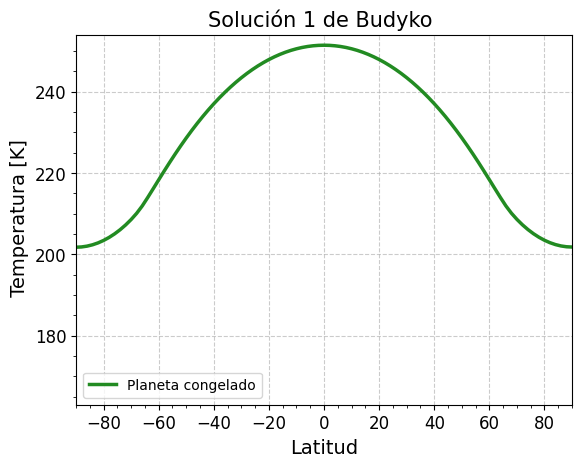

In [101]:
#plt.plot(latitudes,Ts_0,c='k',linewidth=2.5,label='Condiciones iniciales')
plt.plot(latitudes,T_lat,c='forestgreen',linewidth=2.5,label='Planeta congelado')
plt.legend(fancybox=True)
lineplot_setup(-90,90,ymin=163,
      xlab='Latitud',ylab=' Temperatura [K]',title='Solución 1 de Budyko ')

### **<font color="Navy"> 4. Oscilaciones inerciales (11) </font>**

Aunque no lo vimos, existe una solución analítica a las ecuaciones de las oscilaciones inerciales:

\begin{align}
\frac{du}{dt}-fv=0
\end{align}

\begin{align}
\frac{dv}{dt}+fu=0
\end{align}

que se puede escribir como $u(t)=U \,sen(ft)$ y $v(t)=U\,cos(ft)$ donde $U$ es la velocidad de la condición inicial $(u_0,v_0)=(U,0)$. 

- Para una condición inicial y parámetro $f$ de su elección, calcule la solución analítica y la solución numérica utilizando el método de diferencias finitas centradas, hacia adelante, y el método de Runge-Kutta de 4to orden para $h=0.05$.

- El error cuadrático medio (MSE, por sus siglas en inglés) mide qué tan parecida es una distribución comparada con otra. Su fórmula es:

    \begin{align}
    MSE=\frac{1}{N}\sum_{i=1}^{N} (Y_i-\hat{Y}_i)^2
    \end{align}
 donde $\hat{Y_i}$ es el valor de Y que consideramos como verdadero, una observación o un valor calculado analíticamente y $Y_i$ es un pronóstico o valor estimado. 
 
- Calcule el error cuadrático promedio de las 3 estimaciones para el $h$ utilizado anteriormente. 
- Grafique el error cuadrático promedio como función de $h$ para las 3 estimaciones. Para esto, repita las soluciones anteriores pero usando una arreglo de $h$ desde 0.01 hasta 0.5 en saltos de 0.025. 

### **<font color="Navy"> 5. Clausius y Clapeyron viajan a Titán (12) </font>**

En clase resolvimos la ecuación de Clausius Clapeyron para condiciones terrestres. Titán, la luna más grande de Saturno, es uno de los satélites con una atmósfera más activa. Especialmente, tiene un ciclo de metano parecido hasta cierto punto con el ciclo del agua terrestre. Esto quiere decir que el proceso de condensación ocurre frecuentemente en este satélite, sólo que con el metano.

- Resuelva la ecuación de Clausius Clapeyron, de manera analítica para el caso de Titán. Considere que $R_{CH_4}=518.3$ J kg K$^{-1}$ y $L=510 kJ/kg$. Considere que la condición inicial es que la presión de saturación de vapor a 25$^\circ$C es de 621.2 Pa. 
- Resuelva la ecuación ahora numéricamente utilizando diferencias finitas hacia adelante y el método de Runge-Kutta. Note bien que la temperatura superficial en Titán es de alrededor de 100 K y el metano se congela en un punto similar de temperatura. 
- Grafique sus soluciones en el intervalo de 298.15 a 100 K.
- Utilice datos observados y bibliografía para explicar por qué la ecuación de CC nos ayuda a entender los procesos que ocurren en Titán.


### **<font color="Navy"> 6. Budyko versus Sellers (16) </font>**

En clase vimos cómo utilizar la clase Budyko_Sellers para generar simulaciones con el modelo de Budyko o el de Sellers. Varios comentarios inmediatos fueron dirigidos a comparar las diferencias entre las parametrizaciones y los resultados. ¿Qué versión es mejor? ¿Qué modelo es más frío? fueron algunas de las preguntas que nos hicimos pero que no tuvimos tiempo de analizar al punto de llegar a una conclusión contundente. 

- En este ejercicio usted buscará contrastar los dos modelos a través de correr simulaciones y analizar los resultados con el objetivo de contestar las siguientes preguntas:

    - ¿Qué modelo es más frío en los polos? 
    - ¿Qué modelo tiene un transporte más físicamente consistente?
    - ¿Qué modelo tiene una retroalimentación por hielo-albedo más fuerte?
    - ¿Qué modelo es más realista?
    
- Utilice tantos experimentos diferentes y variados como se le puedan ocurrir para poder fundamentar sus respuestas con evidencia. Ilustre todos sus resultados con gráficas del tipo que usted considere conveniente. Exponga con claridad sus argumentos utilizando todo lo que sabe de cada parametrización y proceso. La respuesta más completa y convincente se llevará 4 puntos extra.

Nota: Es evidente que para este ejercicio tiene que utilizar ambos modelos con transporte. Por lo menos en un inicio.





### **<font color="Navy"> 7. La línea del hielo (12) </font>**

- Escriba una función que calcule la latitud mínima a la que una simulación del tipo Budyko Sellers tiene hielo. Por ejemplo, si una de sus simulaciones muestra que la Tierra está congelada en todos los puntos hacia los polos más allá de los 45$^\circ$S o N, esta función debe regresar el valor de 45$^\circ$ como resultado. 

- Utilice 2 de sus simulaciones que considere que tuvieron un cambio más interesante desde las condiciones iniciales hasta la solución final y muestre una serie de tiempo de la línea del hielo calculada con la función que hizo en el inciso anterior para sus dos simulaciones. 

- Explique qué es lo que sucede con la latitud a la que se congela el planeta en sus dos simulaciones y discuta las diferencias entre sus dos experimentos.




### **<font color="Navy"> 8. La temperatura especial (11 puntos)  </font>**

En clase vimos que el modelo de Budyko tiene un rango de temperatura intermedio entre el estado congelado y el líquido, que le llamamos agua-hielo. En este rango del agua-hielo vimos en el Notebook 3.2 y 3.3 que existe un equilibrio inestable. Es decir, para cierta temperatura dentro del intervalo $T_1<T<T_2$ las soluciones divergían hacia el estado congelado y para temperaturas ligeramente más altas las soluciones iban hacia el estado de agua líquida. Esto quiere decir que, en principio, debe existir una temperatura especial que divide a las soluciones que se congelan de las que se descongelan por completo. 

1. Muestre que esta temperatura especial ($T_{esp}$) es la que satisface, en el modelo de Budyko sin transporte, que:

\begin{align}
\bigg(\frac{\overline{Q}(1-\alpha(T_{esp})}{4}-\epsilon\sigma T_{esp}^4\bigg)=0
\end{align}

y explique por qué es esta ecuación la que determina esta temperatura especial. 
 
2. Calcule el valor de la temperatura especial para un caso del modelo de Budyko. Es decir, especifique sus parámetros de la ecuación anterior y encuentre $T_{esp}$. Tal vez le sirva buscar información sobre el método de Newton. 

3. Grafique el valor de la temperatura especial como función de la diferencia entre los albedos de la parametrización de Budyko $\Delta \alpha=\alpha_1-\alpha_2$ en el intervalo de $\Delta \alpha=[0,0.3]$ alrededor de un valor central de 0.5. Ver el notebook 3.3 y los códigos para los diagramas de estabilidad. 

Utilice un valor de insolación de 500 W m$^{-2}$, $\epsilon=0.8$ y $T_1=-5$ y $T_2=5$. 

4. Explique entonces el significado de la temperatura especial en el contexto del modelo de Budyko. En particular, explique la relación entre este parámetro, el proceso de bifurcación que existe en el modelo y la parametrización de albedo.

### **<font color="Navy"> 9. El efecto mariposa  </font>**

Lea el capítulo 1 del libro "The primacy of doubt" de Tim Palmer que se encuentra en el moodle y vea el vídeo de ponencia de Kerry Emanuel https://youtu.be/FvWeK_PfDE4?si=CE9eOHmWfzUT6oAj para contestar:

1. ¿Cuál es el primer encuentro de la ciencia con la idea de que un sistema físico no puede ser predecido después de largos períodos de tiempo?

En primera instancia, desde que Newton formuló sus tres leyes del movimiento, se ha encaminado por la ciencia representar una ecuación compleja que describa el movimiento de tres o más cuerpos en el sistema solar (N-cuerpos). La simplicidad de la que partió Newton fue ignorando todas las variables del sistema solar y solo concentrarse en dos cuerpos. Por ello, el primer encuentro científico para discutir dicha ecuación que la resolvería, fue a finales del siglo XIX por el aniversario del rey Óscar II de Suecia, quien otorgaría un premio a quien la descubriera.

En dicho encuentro, Henri Poincaré señaló que es imposible formular una ecuación que prediga el movimiento de N-cuerpos a larga escala. Esto debido a que las órbitas de tres cuerpos no se repiten, es decir, no son periódicas. Asimismo, comentó que el momento del sistema solar impredecible, así como el clima. Cabe señalar que bajo periodos cortos de tiempo, las órbitas tienen un comportamiento elíptico, pero si se aumenta la escala de tiempo, estas rompen la linealidad y se vuelven "caóticas", siguiendo un patrón totalmente impredecible. Actualmente, con los nuevos sistemas computacionales se corrobora esta misma idea, ya que para simular largos periodos de tiempo se necesita una simulación de millones de años, misma que puede fallar en el primer millón de año. 

Finalmente, y a manera de conclusión, Poincaré descubrió que no se puede predecir sistemas físicos en largos periodos de tiempo. Estos mismos se pueden extrapolar a sistemas económicos, la probabilidad de colisiones de asteroides, si la Tierra se alejará del Sol, entre otros.  

2. ¿Qué pregunta fundamental estaba tratando de resolver Lorenz cuándo descubre el caos? ¿Cuál fue la primera pista que obtuvo Lorenz que lo llevaría a su descubrimiento? ¿Qué implicaciones tiene en la actualidad la teoría de Lorenz para el problema original que quería resolver?

Al encontrarse en conflicto con la manera en que los metereólogos predecían el clima (haciendo una analogía del tiempo del mes pasado), busca que las ecuaciones del clima no siguieran un comportamiento periódico. Al modelarlo en sistemas computacionales, se encontró con la misma premisa que Poincaré; ecuaciones simples y con menos variables modelan un sistema periódico, ergo, predecible. No obstante, los resultados se encontrarían sesgados ya que ¿hasta qué punto de periocidad marcaría el cambio caótico? ¿Y si después de ese periodo se estabiliza?. Para ello, se hizo la siguiente pregunta: ¿la no periodicidad podría encontrarse en sistemas simplificados que pudieran ser descritos con un número muy pequeño de ecuaciones?
Actualmente, su descubrimiento del caos hizo un gran aporte a la comunidad científica, quienes para los matemáticos aplicados fue muy significativo en distintas áreas como los sistemas dinámicos (como por ejemplo el atractor de Lorenz). Además, logró sustentar lo que en un principio había predicado: la complejidad de la atmósfera es un sistema no periódico e impredecible. 
3. ¿Cuáles son las características fundamentales de las ecuaciones de Lorenz que le permitieron usarlas para explicar sus ideas sobre los sistemas dinámicos?

Al principio efectuó 12 ecuaciones, las cuales las simplificó a 7 y al reducir algunas variables a 0, quedaron como final las tres ecuaciones propuestas donde solo tienen como variables X, Y y Z, quienes cambian con el tiempo. Estas mismas son dependientes de las condiciones iniciales para modelarlas en 2D. Fundamentalmente, lo que se propone de estas ecuaciones es que ninguna se repite con el tiempo, es decir, son no periódicas como el clima.

















4. ¿Qué es el determinismo y cómo fue afectado por los descubrimientos de Lorenz? Enumere ejemplos de sistemas deterministas en su vida diaria o en su campo de estudio y contrastélos con sistemas caóticos. ¿Cuál es una propiedad necesaria de un sistema dinámico que exhibe caos, según Palmer? 

El determinismo es una doctrina filosófica que sostiene que todos los eventos, están determinados por causas externas, lo que implica que el futuro está completamente predefinido por el pasado y el presente. Aunado al descubrimiento de Lorenz, se hace una analogía al "efecto mariposa", mismo que es dependiente de las condiciones iniciales como el "Lorenz attractor" y se concluye que el modelo no describe afectaciones de escala menor a sistemas de escala de clima mayor, caso contradictorio al determinismo. 

En mi nuestra vida diaria, algunos casos deterministas pueden ser:
- Hacer deberes académicos que dependan de un ordenar, ya que si hay fallos en el internet o se va a luz, ya se determina que la tarea no se podrá efectuar
- Los semáforos y temporalizadores siguen sin fin un mismo ciclo, el cambio de colores y una enumeración periódica de tiempo
- Un reloj de arena siempre caera con la misma velocidad y mismo tiempo

Por último, para Palmer una propiedad es la sensibilidad a las condiciones iniciales. Esto significa que, incluso pequeñas variaciones en las condiciones iniciales del sistema pueden llevar a resultados completamente diferentes en el tiempo. En otras palabras, pequeñas perturbaciones en el estado inicial del sistema pueden amplificarse y generar resultados impredecibles y divergentes a medida que avanza el tiempo.




















r5 



5. Explique un ejemplo de un sistema caótico en su vida diaria. Elabore en cómo su ejemplo muestra la propiedad de ser sensible a las condiciones iniciales y sea exhaustivo en relacionar el resultado con el "efecto mariposa" y la no-linearidad del sis



Un sistema caótico en un día cotidiano es el transporte público para ir a mis clases. Más específicamente el pumabus de la ruta 9 para poder ir a la Fac. de Ciencias o a los Institutos cercanos. Al ser una ruta bastante concurrida, ya que la toman alumnxs de ingeniería, de contaduría, lxs que vienen del metrobus y lxs que llegan en el metro, si por alguna razón en el camino de ellxs ocurre algo que los retrasara (sea por ejemplo que el metro se pare), llegarán más individuos a las pumaparadas. Esto ocasione que se sature el pumabus y ses casi imposible entrar debido a que alcanza su capacidad máxima. Por lo que como resultado final, sea llegar a las clases tarde por lo lleno que iba el pumabus.

Entonces, este conflicto se puede evitar si desde un inicio empiezo mi rutina desde más temprano y sin distracciones: levantarme a la primera alarma, bañarme en un tiempo rápido, tener el desayuno listo y comida para llevarme preparada, salir con calzado cómodo que no me imposibilite caminar a CU, tomar el primer pumabus para evitar la ola de personas de todas las facultades, bajarme en la parada correcta para así llegar con tiempo al salón de clases. Este caso podría ser más descriptivo como le pasa a Daisy y su accidente que le quitó su habilidad de bailar en Benjamin Button (https://www.youtube.com/watch?v=dakx97gRCx0). tema.



### **<font color="Navy"> Extra 1: Lorenz (6 puntos) </font>**

- Considere el modelo de Lorenz y las condiciones:

    - Tiempo de simulación 25 s. 
    
    - $x_0=1$, $y_0=1$, $z_0=1$.
    
    - $\sigma=10$, $\rho=28$, $\beta=\frac{8}{3}$.
    
Haga experimentos para mostrar la más mínima variación de las condiciones iniciales que sea capaz de producir resultados sustancial y evidentemente diferentes al final de simulación. Es decir, en clase variamos las condiciones iniciales de 2 variables $y$ y $z$ por un valor de 0.01 y mostramos que $x(t)$ se veía diferente. ¿Hasta qué valor mínimo de cambio en las condiciones iniciales es usted capaz de producir una simulación con resultados diferentes?




In [108]:
import numpy as np
from IPython.display import HTML
import math
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [115]:
# ecuaciones del sistema de lorenz
def lorenz(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])
# Método de Runge-Kutta de cuarto orden (RK4)
def rk4_step(t, xyz, sigma, rho,beta,dt):
    k1 = dt * lorenz(t, xyz, sigma,rho, beta)
    k2 = dt * lorenz(t + 0.5 * dt,  xyz + 0.5 * k1, sigma,rho, beta)
    k3 = dt * lorenz(t + 0.5 * dt,  xyz + 0.5 * k2, sigma,rho, beta)
    k4 = dt * lorenz(t + dt,  xyz + k3, sigma,rho, beta)
    return xyz + (k1 + 2 * k2 + 2 * k3 + k4) / 6

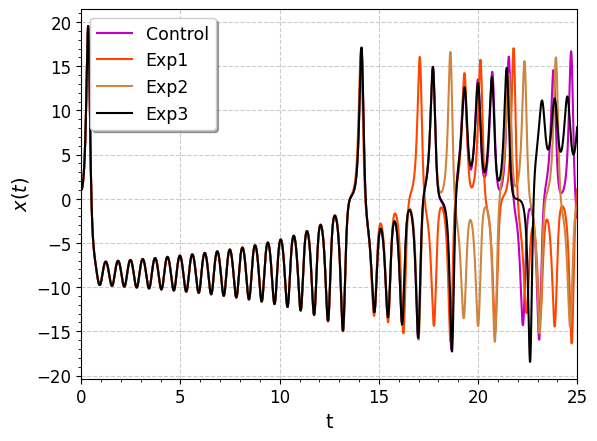

In [128]:
t_max = 25 # Tiempo máximo de simulación
t_values = np.arange(0, t_max, dt)

# condiciones iniciales, primero control
#                                    x0   y0   z0
condiciones_iniciales_1 = np.array([1.0, 1.0, 1.0])
condiciones_iniciales_2 = np.array([1.0,1.01,1.01])
condiciones_iniciales_3 = np.array([1.0,1.001,1.001])
condiciones_iniciales_4 = np.array([1.0,1.0001,1.0001])

# Parámetros del sistema de Lorenz
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0


resultados_Lorenz=np.zeros((4,len(t_values),3))

for ii,init_condit in enumerate([condiciones_iniciales_1,condiciones_iniciales_2, condiciones_iniciales_3, condiciones_iniciales_4]):
    x_values = np.zeros_like(t_values)
    y_values = np.zeros_like(t_values)
    z_values = np.zeros_like(t_values)

    xyz = init_condit
    for i, t in enumerate(t_values):
        x_values[i] = xyz[0]
        y_values[i] = xyz[1]
        z_values[i] = xyz[2]

        xyz = rk4_step(t, xyz, sigma,rho, beta,dt)
    
    plt.plot(t_values,x_values,c=['m','orangered', 'Peru', 'k'][ii],label=['Control','Exp1', 'Exp2', 'Exp3'][ii])
    resultados_Lorenz[ii,:,0]=x_values
    resultados_Lorenz[ii,:,1]=y_values
    resultados_Lorenz[ii,:,2]=z_values
lineplot_setup(0,25,'t','$x(t)$',ymin=None,ymax=None,title=None,legend=True)

Se ve que es en el segundo 15 aproximadamente, donde empiezan a haber las variaciones en la simulación. Veámoslos más gráfico en 3D

In [130]:
x_control=resultados_Lorenz[0,:,0]
y_control=resultados_Lorenz[0,:,1]
z_control=resultados_Lorenz[0,:,2]

x_exp1=resultados_Lorenz[1,:,0]
y_exp1=resultados_Lorenz[1,:,1]
z_exp1=resultados_Lorenz[1,:,2]

x_exp2=resultados_Lorenz[2,:,0]
y_exp2=resultados_Lorenz[2,:,1]
z_exp2=resultados_Lorenz[2,:,2]

x_exp3=resultados_Lorenz[3,:,0]
y_exp3=resultados_Lorenz[3,:,1]
z_exp3=resultados_Lorenz[3,:,2]

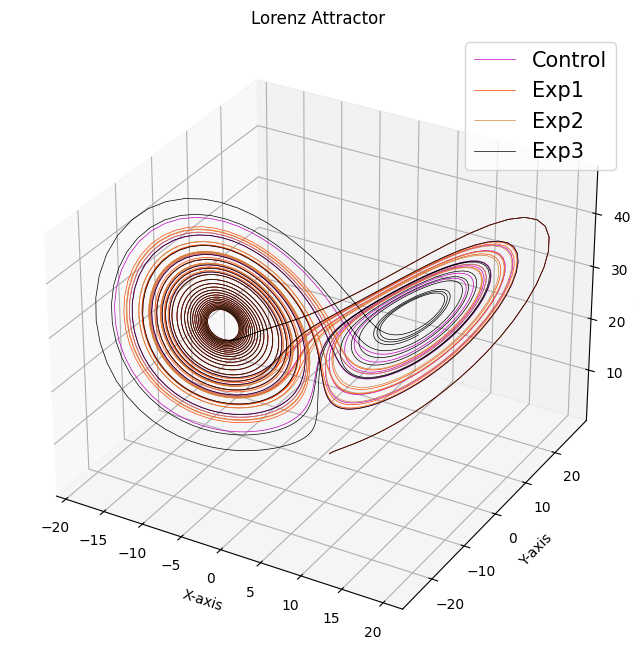

In [131]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.plot(x_control,y_control,z_control, color="m", linewidth=0.5,label='Control')
ax.plot(x_exp1, y_exp1, z_exp1, color="orangered", linewidth=0.5,label='Exp1')
ax.plot(x_exp2, y_exp2, z_exp2, color="Peru", linewidth=0.5,label='Exp2')
ax.plot(x_exp3, y_exp3, z_exp3, color="k", linewidth=0.5,label='Exp3')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Lorenz Attractor")
plt.legend(fontsize=15,fancybox=True)

### **<font color="Navy"> Extra 2: Europa (7 puntos) </font>**

- Considere las condiciones de la luna Europa como distancia Sol-Tierra y constante solar. 

1. Haga experimentos con el modelo de Budyko y el de Sellers en sus formulaciones más estándar (con los parámetros por default) pero ajustados al caso de Europa. ¿Los resultados muestran un cuerpo celeste congelado?

2. Ajuste los parámetros lo más que pueda, dada su investigación de esta luna, para hacerlos más realistas. Esto puede ser el parámetro de emisividad o el parámetro de transporte por ejemplo. Explique cómo cambian sus soluciones de temperatura como resultado del cambio en los parámetros y si se acercan más o menos a la realidad. 




### **<font color="Navy"> Extra 3: Mucho transporte (7 puntos) </font>**

- Considere el modelo de Budyko en su formulación original con transporte donde $\epsilon=0.8$, $\alpha_1=0.7$ y $\alpha_2=0.15$.

1. Haga experimentos con el modelo de Budyko modificando el valor del coeficiente de transporte. Muestre que hay un valor umbrar a partir del cuál es posible llegar a un estado de Snowball con la Tierra congelada por doquier. 

2. Explique, utilizando lo que sabe de los procesos de transporte atmosféricos y océanicos, el modelo de Budyko, y la parametrización de albedo para explicar por qué sucede que, con mucho transporte, se congela la Tierra.